In [1]:
import numpy as np
import json
import os

import pandas as pd
from tqdm import tqdm
import pandas as pd

### List all bots

In [3]:
path = "../game_logs/ranked_games_extended/batch_18 (0,125 - 100)"

bots = []
for game_id in tqdm(os.listdir(path)):
    game = json.load(open(os.path.join(path, game_id, f'game_{game_id}.log'), 'r'))
    bots.append(game["white_name"])
    bots.append(game["black_name"])

bots = np.unique(bots, return_counts=True)

100%|██████████| 343/343 [00:00<00:00, 448.92it/s]


In [24]:
path2 = "../game_logs/historical_games_extended"

bots2 = []
for game_id in tqdm(os.listdir(path2)):
    game = json.load(open(os.path.join(path2, game_id), 'r'))
    bots2.append(game["white_name"])
    bots2.append(game["black_name"])

bots2 = np.unique(bots2, return_counts=True)

100%|██████████| 15978/15978 [00:06<00:00, 2310.07it/s]


In [25]:
bots, bots2

((array(['Châteaux', 'Oracle', 'StrangeFish2', 'Zubat', 'attacker',
         'random', 'trout'], dtype='<U12'),
  array([ 55,  66,  55, 343,  56,  56,  55], dtype=int64)),
 (array(['Châteaux', 'DynamicEntropy', 'Fianchetto', 'Frampt',
         'GarrisonNRL', 'Gnash', 'JKU-CODA', 'Kevin', 'Marmot', 'Oracle',
         'ROOKie', 'SomeRegret', 'StrangeFish2', 'URChIn', 'ai_games_cvi',
         'arandombot', 'armandli', 'attacker', 'callumcanavan', 'penumbra',
         'random', 'srcork', 'trout', 'uccch', 'uccchess', 'wbernar5'],
        dtype='<U14'),
  array([ 913, 1888, 1906,  981, 1894,  966,  897, 1843, 1836, 1907,  922,
          884, 1897,  929,  503,  444,  982, 1906,  981,  969, 1906,  451,
         1907,  443,  818,  983], dtype=int64)))

## Bot distributions

In [6]:
data = {
    bot: []
    for bot in bots[0]
}

for game_id in tqdm(os.listdir(path)):
    game = json.load(open(os.path.join(path, game_id, f'game_{game_id}.log'), 'r'))
    for color in [True, False]:
        bot = game["white_name"] if color else game["black_name"]
        if game["post_sense_uncertainty"]["true" if color else "false"]:
            data[bot] += list(enumerate(game["post_sense_uncertainty"]["true" if color else "false"]))

100%|██████████| 343/343 [00:00<00:00, 1354.86it/s]


In [26]:
data2 = {
    bot: []
    for bot in bots2[0]
}

for game_id in tqdm(os.listdir(path2)):
    game = json.load(open(os.path.join(path2, game_id), 'r'))
    for color in [True, False]:
        bot = game["white_name"] if color else game["black_name"]
        if game["post_sense_uncertainty"]["true" if color else "false"]:
            data2[bot] += list(enumerate(game["post_sense_uncertainty"]["true" if color else "false"]))

100%|██████████| 15978/15978 [00:06<00:00, 2311.70it/s]


In [27]:
import matplotlib.pyplot as plt

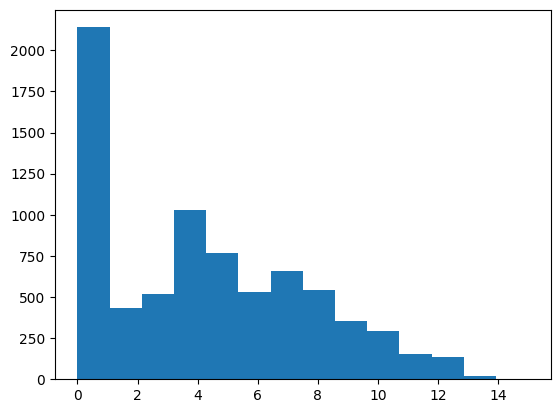

In [8]:
plt.hist([np.log2(x[1]) for y in data.values() for x in y], bins=np.linspace(0, 15, 15))
plt.show()

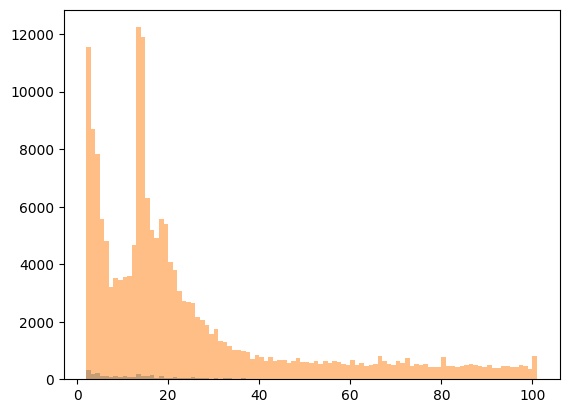

In [29]:
plt.hist([x[1] for y in data.values() for x in y], bins=np.arange(100)+2, alpha=0.5)
plt.hist([x[1] for y in data2.values() for x in y], bins=np.arange(100)+2, alpha=0.5)
plt.show()

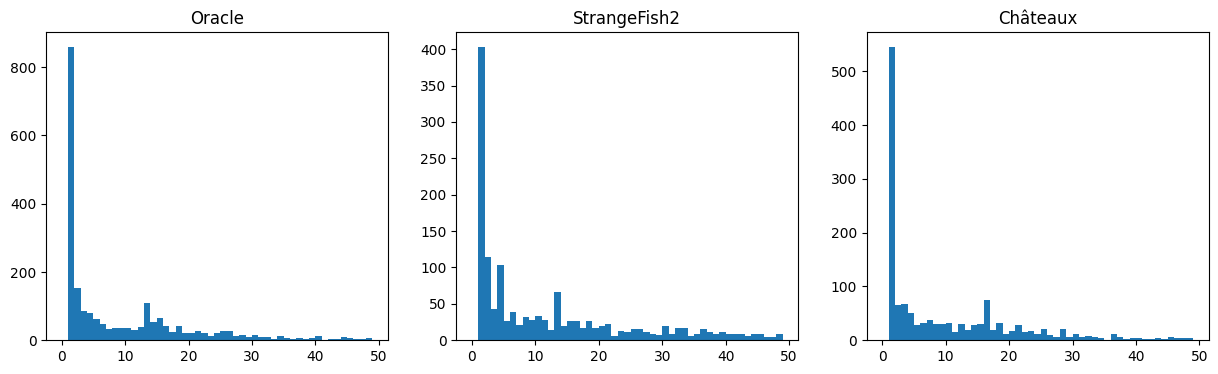

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# fig.set_figsize(15, 9)

graph_bots = ['Oracle', 'StrangeFish2', 'Châteaux']

for i, ax in enumerate(np.array(axs).flat):
    bot = graph_bots[i]
    # ax.hist([np.log10(x[1]) for x in data[bot]], bins=np.linspace(0, 5, 10))
    ax.hist([x[1] for x in data[bot]], bins=np.arange(50))
    ax.set_title(bot)

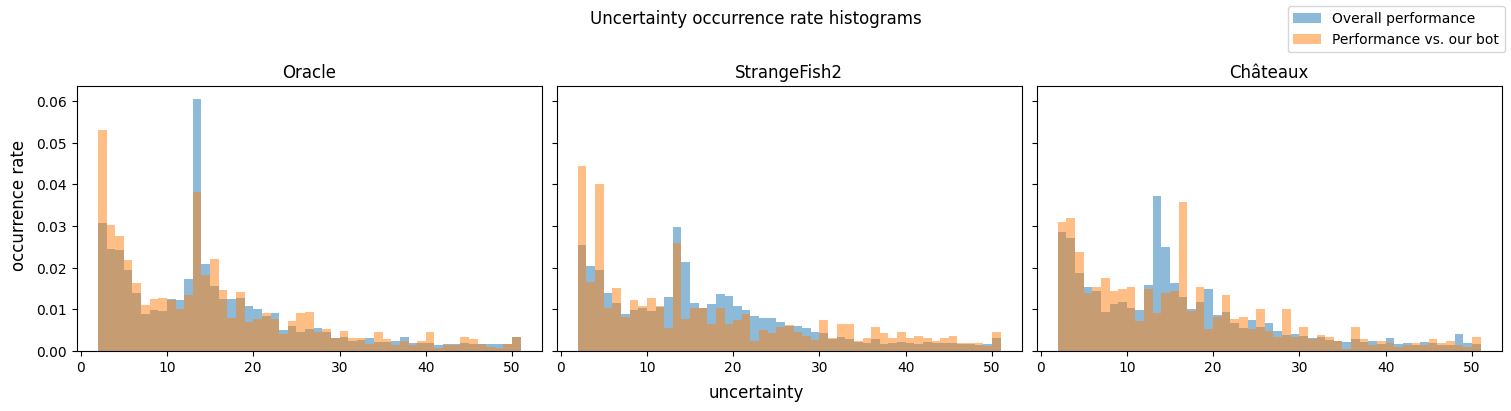

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True, constrained_layout=True)
fig.supxlabel('uncertainty')
fig.supylabel('occurrence rate')
fig.suptitle('Uncertainty occurrence rate histograms')


graph_bots = ['Oracle', 'StrangeFish2', 'Châteaux']

for i, ax in enumerate(np.array(axs).flat):
    bot = graph_bots[i]
    # ax.hist([np.log10(x[1]) for x in data[bot]], bins=np.linspace(0, 5, 10))
    l1 = ax.hist(
        [x[1] for x in data2[bot]], 
        bins=np.arange(50)+2, weights=np.ones(len(data2[bot])) / len(data2[bot]),
        alpha=0.5, 
        label='Overall performance' if i == 0 else ''
    )
    l2 = ax.hist(
        [x[1] for x in data[bot]], 
        bins=np.arange(50)+2, 
        weights=np.ones(len(data[bot])) / len(data[bot]), 
        alpha=0.5, 
        label='Performance vs. our bot' if i == 0 else ''
    )
    
    ax.set_title(bot)

fig.legend(loc='outside upper right')
# plt.savefig('imgs/dataset_uncertainty_hist.png')

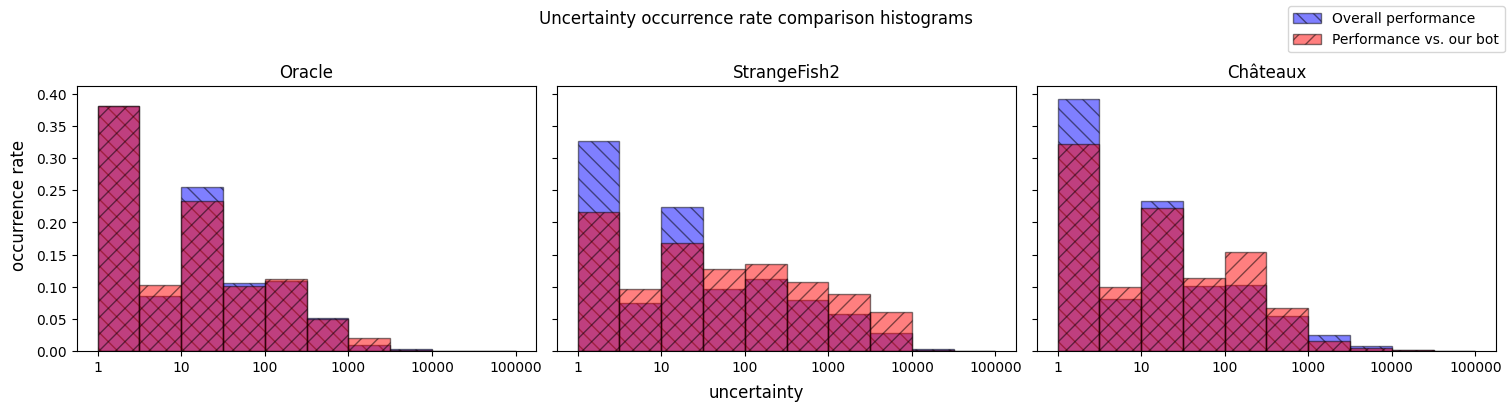

In [67]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True, constrained_layout=True)
fig.supxlabel('uncertainty')
fig.supylabel('occurrence rate')
fig.suptitle('Uncertainty occurrence rate comparison histograms')


graph_bots = ['Oracle', 'StrangeFish2', 'Châteaux']

for i, ax in enumerate(np.array(axs).flat):
    bot = graph_bots[i]
    space = np.linspace(0, 5, 11)
    
    l1 = ax.hist(
        [np.log10(x[1]) for x in data2[bot]], 
        bins=space, 
        weights=np.ones(len(data2[bot])) / len(data2[bot]),
        alpha=0.5, 
        label='Overall performance' if i == 0 else '',
        hatch='\\\\',
        ec='black',
        color='blue'
    )
    l2 = ax.hist(
        [np.log10(x[1]) for x in data[bot]], 
        bins=space, 
        weights=np.ones(len(data[bot])) / len(data[bot]), 
        alpha=0.5, 
        label='Performance vs. our bot' if i == 0 else '',
        hatch='//',
        ec='black',
        color='red'
    )
    ax.set_xticks(np.arange(6), 10**np.arange(6))
    
    ax.set_title(bot)

fig.legend(loc='outside upper right')
    
plt.savefig('imgs/dataset_uncertainty_comparison_hist_log.png')
plt.show()

In [43]:
# fig, axs = plt.subplots(2, 4, figsize=(15, 6))

# fig.set_figsize(15, 9)

graph_bots = ['Oracle', 'StrangeFish2', 'Châteaux']

bot_one_pos = pd.DataFrame([
    {
        'Bot': bot, 
        'Certainty rate overall': f'{100*len([x[1] for x in data2[bot] if x[1] == 1]) / len([x[1] for x in data2[bot]]):0.1f}%',
        'Certainty rate vs. our bot': f'{100*len([x[1] for x in data[bot] if x[1] == 1]) / len([x[1] for x in data[bot]]):0.1f}%'
    }
    for bot in graph_bots
    if len([x[1] for x in data[bot]])
])

bot_one_pos

,Bot,Certainty rate overall,Certainty rate vs. our bot
0,Oracle,32.7%,29.7%
1,StrangeFish2,28.0%,15.5%
2,Châteaux,33.7%,25.9%


In [49]:
bot_one_pos.to_csv('tables/certainty_comparison.csv', index=False)
print(bot_one_pos.to_latex(index=False))

\begin{tabular}{lll}
\toprule
         Bot & Certainty rate overall & Certainty rate vs. our bot \\
\midrule
      Oracle &                  32.7\% &                      29.7\% \\
StrangeFish2 &                  28.0\% &                      15.5\% \\
    Châteaux &                  33.7\% &                      25.9\% \\
\bottomrule
\end{tabular}


## Average in duration

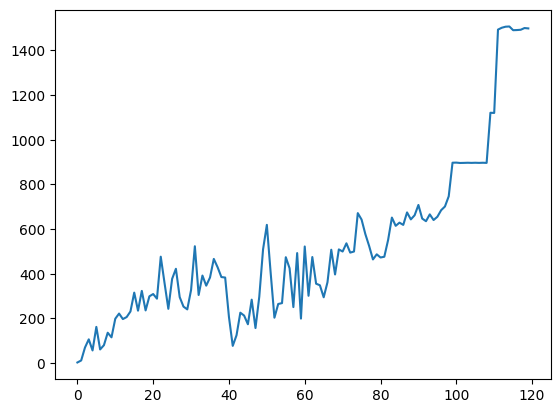

In [20]:
values = [x for y in data.values() for x in y]
size = max([x[0] for x in values]) + 1

arr = [[] for _ in range(size)]
counts = np.zeros(size)
for val in values:
    arr[val[0]].append(val[1])
    counts[val[0]] += 1
    
res = np.array([np.quantile(vals, [0.1, 0.5, 0.9]) for vals in arr])

res2 = np.array([np.mean(vals) for vals in arr])

mx = 120

plt.plot(np.arange(mx), res2[:mx])
# plt.plot(np.arange(mx), res[:mx, 1])
plt.show()

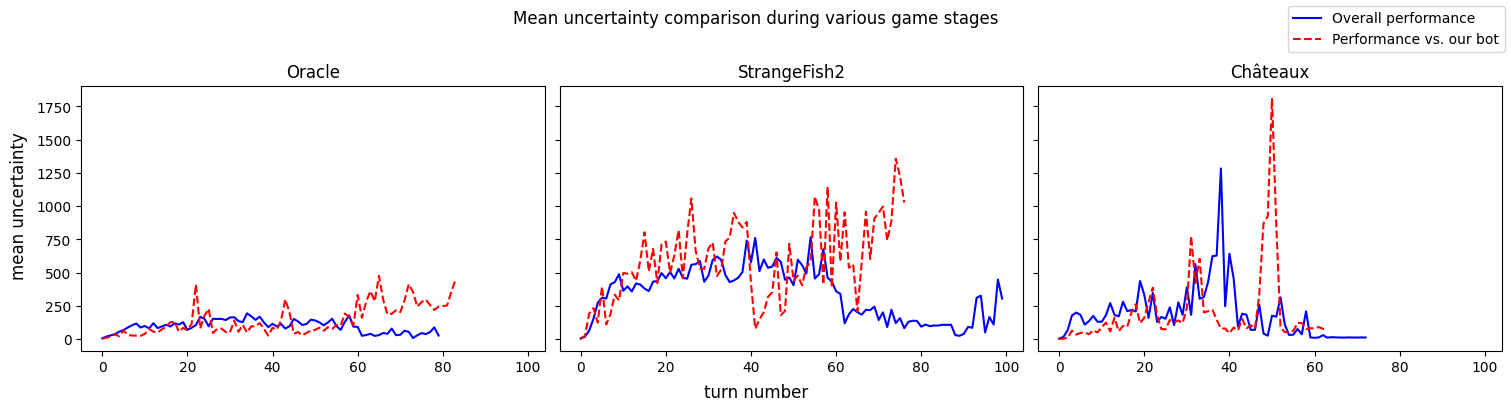

In [66]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True, constrained_layout=True)
fig.supxlabel('turn number')
fig.supylabel('mean uncertainty')
fig.suptitle('Mean uncertainty comparison during various game stages')

graph_bots = ['Oracle', 'StrangeFish2', 'Châteaux']

for i, ax in enumerate(np.array(axs).flat):
    bot = graph_bots[i]
    ax.set_title(bot)
    mx = 100
    
    values = [x for x in data2[bot]]
    size = max([x[0] for x in values]) + 1
    
    arr = [[] for _ in range(size)]
    counts = np.zeros(size)
    for val in values:
        arr[val[0]].append(val[1])
        counts[val[0]] += 1
            
    res2 = np.array([np.mean(vals) for vals in arr if len(vals) > 5])
    
    ax.plot(np.arange(min(mx, len(res2))), res2[:mx], 'b', label='Overall performance' if i == 0 else '')
    
    values = [x for x in data[bot]]
    size = max([x[0] for x in values]) + 1
    
    arr = [[] for _ in range(size)]
    counts = np.zeros(size)
    for val in values:
        arr[val[0]].append(val[1])
        counts[val[0]] += 1
            
    res2 = np.array([np.mean(vals) for vals in arr if len(vals) > 5])
    
    
    ax.plot(np.arange(min(mx, len(res2))), res2[:mx], 'r--', label='Performance vs. our bot' if i == 0 else '')
    

fig.legend(loc='outside upper right')
plt.savefig('imgs/dataset_uncertainty_time_comparison_graph.png')
plt.show()